In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### gradient_descent ###

In [2]:
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.hstack((X, bias))

def mse_loss(theta, X, y):
    theta = theta.reshape(-1, 1)
    predictions = np.dot(X, theta)
    errors = predictions - y
    return np.mean(errors ** 2) / 2

def gradient_descent(theta, X, y, learning_rate=0.02, num_epochs=2000):
    theta = theta.reshape(-1, 1)
    cost_history = []
    for _ in range(num_epochs):
        predictions = np.dot(X, theta)
        gradient = np.dot(X.transpose(), (predictions - y))
        theta -= (learning_rate / len(y)) * gradient
        cost_history.append(mse_loss(theta, X, y))
    return theta, cost_history

### homework_ex1_01  ###

In [3]:
data1 = pd.read_csv("../data/ex1data1.txt", names=["population", "profit"])
X1 = np.array(data1['population']).reshape(97, 1)
y1 = np.array(data1['profit']).reshape(97, 1)

In [4]:
X1_with_bias = add_bias(X1)
initial_theta = np.zeros((2, 1))

In [5]:
init_mse_loss = mse_loss(initial_theta, X1_with_bias, y1)
print(f"初始 MSE 损失: {init_mse_loss}")

final_theta, cost_history = gradient_descent(initial_theta, X1_with_bias, y1)
print(f"最终的 theta 值: {final_theta}")

final_mse_loss = mse_loss(final_theta, X1_with_bias, y1)
print(f"最终 MSE 损失: {final_mse_loss}")

初始 MSE 损失: 32.072733877455676
最终的 theta 值: [[ 1.19274237]
 [-3.8928815 ]]
最终 MSE 损失: 4.476972141289019


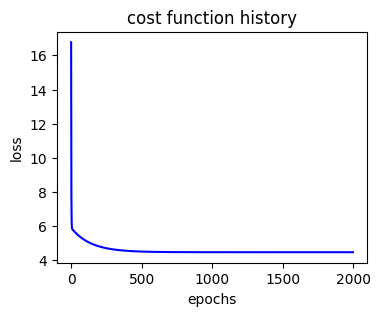

In [6]:
def plot_cost_curve(cost_history, figsize=(4, 3)):
    plt.figure(figsize=figsize)
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.title('cost function history')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

plot_cost_curve(cost_history)

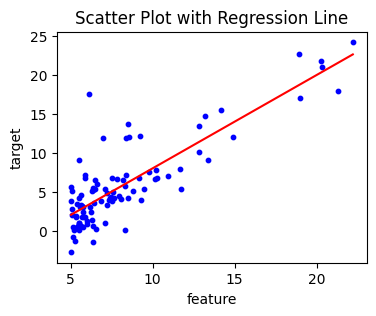

In [7]:
slope = final_theta[0][0]
intercept = final_theta[1][0]
line_x = np.linspace(X1.min(), X1.max(), 100)
line_y = slope * line_x + intercept

plt.figure(figsize=(4, 3))
plt.scatter(X1, y1, color='blue', s=10)
plt.plot(line_x, line_y, color='red')
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Scatter Plot with Regression Line')
plt.show()

### homework_ex1_02  ###

In [8]:
data2 = pd.read_csv('../data/ex1data2.txt', names=['size', 'bedroom', 'price'])
data2 = (data2 - data2.mean()) / data2.std()

X2 = np.array(data2.iloc[:, 0:-1])
y2 = np.array(data2.iloc[:, -1]).reshape((-1, 1))

In [9]:
X2_with_bias = add_bias(X2)
initial_theta = np.zeros((3, 1))

In [10]:
init_mse_loss = mse_loss(initial_theta, X2_with_bias, y2)
print(f"初始 MSE 损失: {init_mse_loss}")

final_theta, cost_history = gradient_descent(initial_theta, X2_with_bias, y2)
print(f"最终的 theta 值: {final_theta}")

final_mse_loss = mse_loss(final_theta, X2_with_bias, y2)
print(f"最终 MSE 损失: {final_mse_loss}")

初始 MSE 损失: 0.4893617021276595
最终的 theta 值: [[ 8.84765973e-01]
 [-5.31788053e-02]
 [-1.08317610e-16]]
最终 MSE 损失: 0.13068648053904205


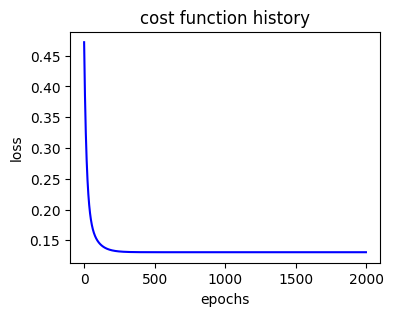

In [11]:
def plot_cost_curve(cost_history, figsize=(4, 3)):
    plt.figure(figsize=figsize)
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.title('cost function history')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()

plot_cost_curve(cost_history)